# Lab3-Basic Learning Algorithms

The goal of this lab is to run different ML codes for supervised and unsupervised datasets. Collect the error, save & load the model. Record the accuracy of the model and visualize the outputs. The steps of building an ML algorithm are explained. A simple example on search algorithm is also discussed.


## Section2: Search Algorithms

### 2.1.Depth-First Search (DFS)

The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

In this example, you will find a graph solved with DFS. Link of Description: Graph Example - DFSLinks to an external site.

#### Depth-First Search (DFS) Description:

DFS is an algorithm for traversing or searching tree or graph data structures. It starts at a designated node (often referred to as the 'root' in a tree or a 'start' node in a graph) and explores as far as possible along each branch before backtracking.

Here's a general outline of the DFS algorithm:

1. Start at the initial node.
2. Mark the initial node as visited.
3. For each unvisited neighbor of the current node:
   1. Perform DFS recursively on that neighbor.
4. Repeat step 3 until all nodes are visited.

DFS is typically implemented using recursion or a stack data structure.

The scope of the depth-first search (DFS) traversal is to visit and explore all nodes reachable from the starting node within the given graph. It systematically explores each branch of the graph as deeply as possible before backtracking.

#### The space complexity of the algorithm is O(V).

#### Applications

Depth-First Search Algorithm has a wide range of applications for practical purposes. Some of them are as discussed below:

- For finding the strongly connected components of the graph
- For finding the path
- To test if the graph is bipartite
- For detecting cycles in a graph
- Topological Sorting
- Solving the puzzle with only one solution.
- Network Analysis
- Mapping Routes
- Scheduling a problem


In [1]:
# Using a Python dictionary to act as an adjacency list
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = set()  # Set to keep track of visited nodes of graph.


def dfs(visited, graph, node):  # function for dfs
    if node not in visited:
        print(node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)


# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, "5")

Following is the Depth-First Search
5
3
2
4
8
7


DFS algorithm can search for a specific target node and return the path towards that node:


In [2]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}


def dfs_path(graph, start, target, path=[]):
    path = path + [start]  # Append the current node to the path
    if start == target:  # If the current node is the target node, return the path
        return path
    if start not in graph:  # If the current node is not in the graph, return None
        return None
    for neighbor in graph[start]:  # Iterate through neighbors of the current node
        if (
            neighbor not in path
        ):  # Ensure neighbor is not already in the path to avoid cycles
            new_path = dfs_path(
                graph, neighbor, target, path
            )  # Recursively search for the target node
            if new_path:  # If the target node is found, return the path
                return new_path
    return None  # Return None if the target node is not found in the reachable nodes from the start node


# Example usage:
start_node = "5"
target_node = "8"
path = dfs_path(graph, start_node, target_node)
if path:
    print(f"Path from {start_node} to {target_node}: {path}")
else:
    print(f"No path found from {start_node} to {target_node}")

Path from 5 to 8: ['5', '3', '4', '8']


To test if a graph is **bipartite** using depth-first search (DFS), you can assign colors to nodes during the traversal and check if there are any adjacent nodes with the same color. If adjacent nodes have the same color, the graph is not bipartite; otherwise, it is bipartite.

Bipartite graph:

- A bipartite graph can be split into two sets of vertices such that every edge connects a vertex from one set to a vertex in the other set.
- There are no edges within the same set of vertices.
- Bipartite graphs are often represented as G=(V_1,V_2,E), where V_1 and V_2 are the two disjoint sets of vertices.

Note: A classic example of a bipartite graph is a bipartite graph representing relationships between students and courses in a university, where edges connect students to the courses they are enrolled in.


In [3]:
def is_bipartite(graph):
    color = {}  # Dictionary to store the color of each node
    for node in graph:
        if node not in color:  # If the node has not been colored yet
            if not dfs_color(
                graph, node, color, 0
            ):  # Perform DFS coloring starting from the node
                return False  # If DFS returns False, the graph is not bipartite
    return True  # If DFS traversal completes without conflicts, the graph is bipartite


def dfs_color(graph, node, color, node_color):
    if node in color:
        return (
            color[node] == node_color
        )  # Check if the current node's color matches the expected color
    color[node] = node_color  # Assign color to the current node
    for neighbor in graph[node]:
        if not dfs_color(
            graph, neighbor, color, 1 - node_color
        ):  # Recursively color neighbors with opposite color
            return False  # If any conflict is found in neighbors, return False
    return True  # If DFS traversal completes without conflicts, return True


# Example usage:
graph = {
    "1": ["2", "3"],
    "2": ["1", "4"],
    "3": ["1", "5"],
    "4": ["2", "5"],
    "5": ["3", "4"],
}
if is_bipartite(graph):
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")

The graph is not bipartite.


### 2.1.Breath-First Search (BFS)

BFS algorithm starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level. Extra memory, usually a queue, is needed to keep track of the child nodes that were encountered but not yet explored.

BFS is an algorithm used for traversing or searching tree or graph data structures. It starts at a designated node (often referred to as the 'root' in a tree or a 'start' node in a graph) and explores all neighbor nodes at the present depth before moving on to nodes at the next depth level.

Here's a general outline of the BFS algorithm:

1. Start at the initial node.
2. Add the initial node to the queue.
3. While the queue is not empty:
   1. Dequeue a node from the front of the queue.
   2. Visit the dequeued node.
   3. Enqueue all unvisited neighbor nodes of the dequeued node.
4. Repeat step 3 until the queue is empty.

BFS explores nodes level by level, ensuring that nodes at the same level are visited before moving on to nodes at the next level.


In [4]:
graph = {"5": ["3", "7"], "3": ["2", "4"], "7": ["8"], "2": [], "4": ["8"], "8": []}

visited = []  # List for visited nodes.
queue = []  # Initialize a queue


def bfs(visited, graph, node):  # function for BFS
    visited.append(node)
    queue.append(node)

    while queue:  # Creating loop to visit each node
        m = queue.pop(0)
        print(m, end=" ")

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)


# Driver Code
print("Following is the Breadth-First Search")
bfs(visited, graph, "5")  # function calling

Following is the Breadth-First Search
5 3 7 2 4 8 

#### Applications of BFS:

1. Shortest Path and Minimum Spanning Tree: BFS can be used to find the shortest path between two nodes in an unweighted graph and to construct minimum spanning trees in weighted graphs.
2. Network Routing and Broadcast: BFS can be used to discover paths and broadcast messages in networks, such as the internet or social networks.
3. Web Crawling: BFS is used by search engines to crawl and index web pages efficiently, exploring web pages level by level.
4. Garbage Collection: BFS is used in garbage collection algorithms in programming languages to find and reclaim memory that is no longer in use.
5. Puzzle Solving: BFS can be used to solve puzzles like the sliding tile puzzle or the maze problem by exploring possible states level by level until a solution is found.


## Section1: Introduction to Supervised and Unsupervised Learning

There are several library options to develop machine learning projects including Pytorch and Tensorflow, also (others like scikit-learn, Tensorforce, and coach-RL depending on the application). The choice between these often depends on individual preferences, specific project requirements, and the development paradigm favored by practitioners. In this course, we will be focusing on Pytorch:

### 1.1.Pytorch (Library)

PyTorch, a powerful open-source machine learning library, stands at the forefront of deep learning frameworks. Developed by Facebook's AI Research lab (FAIR), PyTorch seamlessly combines flexibility and efficiency, making it a preferred choice for researchers and developers alike. From prototyping to production deployment, PyTorch empowers practitioners to tackle diverse machine learning tasks(It uses more resources than TF but provides more speed when coupled with GPU).

Some of the most famous real-world applications done by Pytorch:

- OpenAI's GPT-2 and GPT-3: OpenAI used PyTorch to implement its state-of-the-art language models
- Facebook Translation: PyTorch is utilized in the development of Facebook's machine translation systems.
- Tesla Autopilot: Tesla has been reported to use PyTorch in its Autopilot system, which is responsible for various aspects of autonomous driving.
- AI for Healthcare at Mount Sinai Hospital: Mount Sinai Hospital in New York has employed PyTorch in various projects related to healthcare and medical imaging.

To use Pytorch we use these import functions:


In [7]:
# To load the whole library for making datasets, torch optimizer, and other functions
import torch

# to use torch functions related to building neural networks, fitting data, loss functions and other functions
import torch.nn as nn

### 1.2. Building dataset/importing in Pytorch

You can build a tensor dataset in Pytorch or import it from Pandas dataframe as we mentioned in the previous lab.


In [14]:
# To load the whole library for making datasets, torch optimizer, and other functions
import torch
import pandas as pd

# to use torch functions related to building neural networks, fitting data, loss functions and other functions
import torch.nn as nn

# Making tensor input and output data
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[2.0], [4.0], [6.0]])
print(x_data)
print(y_data)

# Load the dataset from pandas data frame - X and Y are pandas data frames
data = {"Height": [165.4, 175.9, 125.2, 189.5], "Age": [25, 30, 15, 40]}
df = pd.DataFrame(data)
X = df["Height"]
Y = df["Age"]
X = torch.tensor(X.values, dtype=torch.float32)
Y = torch.tensor(Y.values, dtype=torch.float32)
print(X)
print(Y)

# Reshape function used to transpose or lower the dimension of the data
# - if your y function consists of 1 column of data in the shape of (1,X),
# you can reduce the number of dimensions to one by the below command.
Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)
print(Y)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2.],
        [4.],
        [6.]])
tensor([165.4000, 175.9000, 125.2000, 189.5000])
tensor([25., 30., 15., 40.])
tensor([[25.],
        [30.],
        [15.],
        [40.]])


/var/folders/xs/hb6fwm8j38qbb3z21p6821lw0000gn/T/ipykernel_62236/3848530406.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float32).reshape(-1, 1)


## Tensor Dataset:

### Tensor:

In the context of PyTorch (and other deep learning frameworks), a tensor is a multi-dimensional array that can represent data of different types (e.g., float, integer) and different dimensions (e.g., 1D, 2D, 3D, etc.).
Tensors are fundamental data structures used for storing input data, model parameters, and output predictions in deep learning models.

### Tensor Dataset:

A tensor dataset is a collection of tensors, typically used as input data and corresponding output labels in machine learning and deep learning tasks. For example, in supervised learning, a tensor dataset consists of input data tensors (features) and output data tensors (labels/targets). These datasets are often used for training, validation, and testing machine learning models.

## DataFrame:

DataFrame: In the context of libraries like pandas (and similar libraries in other programming languages), a DataFrame is a 2-dimensional labeled data structure with columns of potentially different data types. It's similar to a table or spreadsheet, where each row represents an observation (sample) and each column represents a feature or attribute of that observation.

### DataFrame vs. Tensor Dataset:

While both are used for organizing and manipulating data, dataframes are more versatile in handling tabular data with labeled rows and columns, while tensor datasets are more specialized for numerical data, especially in the context of deep learning. Dataframes provide functionalities for data manipulation, aggregation, filtering, and visualization, while tensor datasets are optimized for numerical computations and operations used in deep learning models.

## Differences:

1. **_Dimensionality:_** Tensors can have multiple dimensions (1D, 2D, 3D, etc.), while dataframes are strictly 2-dimensional.
2. **_Data Types:_** Tensors are more limited in terms of data types, typically supporting numeric types (float, integer), while dataframes can handle a wider range of data types (numeric, string, datetime, etc.).
3. **_Usage:_** Tensor datasets are commonly used in deep learning for representing input/output data, model parameters, and predictions, while dataframes are more commonly used for data manipulation, exploration, and analysis in general-purpose data processing tasks.

In summary, tensor datasets are specialized data structures used in deep learning for handling numerical data, while dataframes are more general-purpose data structures used for tabular data manipulation and analysis in data science and analytics task


In [ ]:
# For saving and loading your trained model in Pytorch the below codes are used.
# "model" is your trained model:

# Showing learn parameters during the training stage

# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])
# # SAving your model
# torch.save(model.state_dict(), PATH)

# # LOading your model
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim


# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(1, 1)  # Single input feature and single output

    def forward(self, x):
        return self.fc(x)


# Instantiate the model
model = SimpleModel()

# Define some sample data
x_data = torch.tensor([[1.0], [2.0], [3.0], [4]])
y_data = torch.tensor([[2.0], [4.0], [6.0], [8]])

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    # Forward pass
    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Show learned parameters during training
print("Learned Parameters:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

# Save the model
PATH = "simple_model.pth"
torch.save(model.state_dict(), PATH)
print("Model saved to:", PATH)

# Load the model
model = SimpleModel()  # Re-instantiate the model with the same architecture
model.load_state_dict(torch.load(PATH))
model.eval()
print("Model loaded from:", PATH)

# Test the loaded model
test_input = torch.tensor([[8.0]])
predicted_output = model(test_input)
print(
    "Predicted output for input {}: {}".format(
        test_input.item(), predicted_output.item()
    )
)

Learned Parameters:
fc.weight 	 tensor([[1.7381]])
fc.bias 	 tensor([0.7699])
Model saved to: simple_model.pth
Model loaded from: simple_model.pth
Predicted output for input 8.0: 14.674945831298828


## Section3: Supervised Machine Learning


### 3.0. Getting Started

In this section, we will develop basic ML algorithms to map inputs and outputs.

Every machine learning code has 5 main sections:

- I. importing preprocessed datasets (refer to Lab#1),
- II. defining the algorithm,
- III. training the model,
- IV. evaluating the model,
- V. visualizing outputs (optional).

It is important to check in each ML code whether it includes all of these sections. As a suggestion, it is a good practice to specify each of these sections with comments (done with # for single-line comments and '' open close'' for multi-line comments) which will make debugging and code readability much easier. As you become more skilled in coding you might need less or no commenting. The 5-section commenting is done in the example below.


### 3.1.Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Since implementing the decision tree is much easier with the Scikit-learn library, for this particular algorithm we will use it instead of Pytorch.

Some advantages of decision trees are:

- Simple to understand and to interpret.
- Trees can be visualized.
- Requires little data preparation.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well,
- Overfitting
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

Let's find how the decision tree works with an example. Download the heart study dataset below. It is a collected dataset from more than 4000 patients (age, smoking habit, BMI, blood pressure medicine, history of stroke etc.) to predict high or low risk of heart attack in adults.


   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

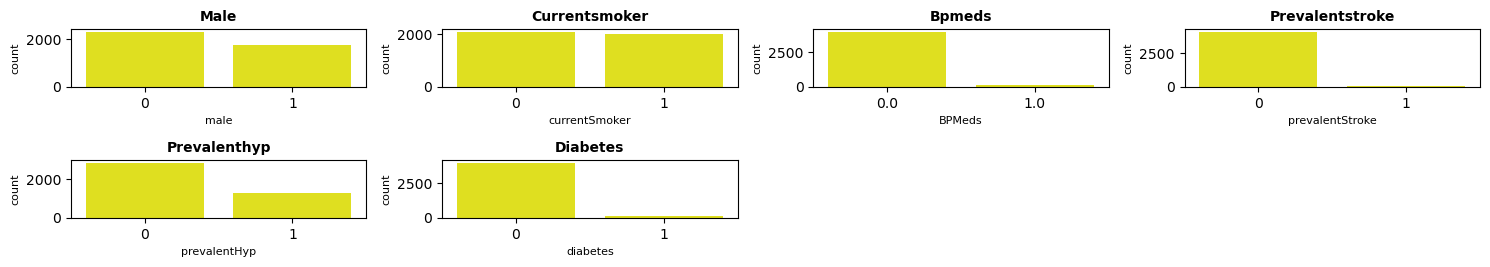

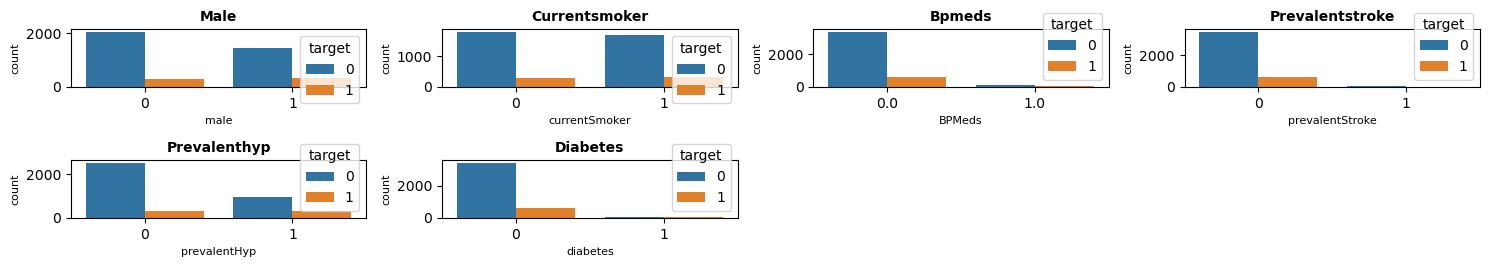

In [43]:
# Importing the libraries that are being used
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split  # preprocessing: Train/Test split
from sklearn.model_selection import cross_val_score  # Scoring the output result
import matplotlib.pyplot as plt  # Ploting
from sklearn.tree import DecisionTreeClassifier  # Sci-kit learn function - DT
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Section I-importing data load the dataset, split into input (X) and output (y) variables.
# Inputing the dataset and get an overview
dframe = pd.read_csv(r"./data/decision_tree/framingham.csv")
df = dframe.copy()
print(df.head())

# Preprocessing data
# IT SEEMS EDUCATION HAS NO REALTION WITH HEART DISEASE SO LETS DROP IT
df.drop(["education"], axis=1, inplace=True)
df.rename(
    columns={"TenYearCHD": "target"}, inplace=True
)  # change the name of "TenYearCHD" to "target"

# good! now lets see all attributes are numerical attributes in one place
df
print(df.shape)
df.info()

# Finidng the number of missing data
df.isnull().sum()
# Handling missing data: here, filling all null values in glucose attribute with the mean value
df["glucose"].fillna(df["glucose"].mean(), inplace=True)
df.dropna(inplace=True)

# validation in preprocessing: Now lets visualize the data.
# First, Lets see the number of 0 and 1 in in the "Outcome" which is the number of diabetes patients
catag, random = [i for i in df.columns if len(df[i].unique()) < 4 and i != "target"], [
    i for i in df.columns if len(df[i].unique()) >= 4
]
plt.figure(figsize=(15, 5))
for n, column in enumerate(catag):
    plot = plt.subplot(4, 4, n + 1)
    plt.xlabel(column, fontsize=8)
    plt.ylabel("count", fontsize=8)
    sns.countplot(x=df[column], color="yellow", data=df)
    plt.title(f"{column.title()}", weight="bold", fontsize=10)
    plt.tight_layout()
# Now, Lets see how many patients in each group are diabetes (1) or not (0) (finding the most relevant data to diabetes risk)
print(df["target"])
print(df["target"][0])
plt.figure(figsize=(15, 5))
for n, column in enumerate(catag):
    plot = plt.subplot(4, 4, n + 1)
    plt.xlabel(column, fontsize=8)
    plt.ylabel("count", fontsize=8)
    sns.countplot(x=df[column], hue=df["target"], data=df)
    plt.title(f"{column.title()}", weight="bold", fontsize=10)
    plt.tight_layout()

In [44]:
## Section II-defining the model: Decision tree algorithm- Applying the decision tree
# Saving X and Y data in separate variables and splitting train/validation samples
x = df.drop(["target"], axis=1)
y = df["target"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.22, random_state=40)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

# Defining a decision tree with a maximum branch number of 3. More branches can lead to more accurate results, but might lead to overfitting as well
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Secion III-training the model
dtree.fit(xtrain, ytrain)

# test for validation dataset
ypred_dtree = dtree.predict(xtest)
dtree_model = accuracy_score(ytest, ypred_dtree)

print(f"Decision-Tree model accuracy: {dtree_model:.2f}")

# test for train data
ypred_dtree2 = dtree.predict(xtrain)

Decision-Tree model accuracy: 0.84


In [50]:
# Section IV-evaluating the model
dtree_model2 = accuracy_score(ytrain, ypred_dtree2)
print(
    f"Accuracy for validation set :{dtree_model:.2f}\naccuracy for train set :{dtree_model2:.2f}"
)
score2 = cross_val_score(dtree, xtrain, ytrain, cv=30)
print(f"\nafter cross validation the accuracy is {round(score2.mean(),2)}")
# Precesion, F1-score, Accuracy
print(classification_report(ytest, ypred_dtree))

Accuracy for validation set :0.84
accuracy for train set :0.85

after cross validation the accuracy is 0.85
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       764
           1       0.31      0.04      0.07       136

    accuracy                           0.84       900
   macro avg       0.58      0.51      0.49       900
weighted avg       0.77      0.84      0.79       900



**_Precision:_** Precision measures the proportion of true positive predictions among all positive predictions.

- For class 0: Precision is 0.85, which means 85% of the instances predicted as class 0 are actually class 0.
- For class 1: Precision is 0.31, indicating that only 31% of the instances predicted as class 1 are actually class 1.

**_Recall:_** Recall (also known as sensitivity) measures the proportion of true positive instances that were correctly identified.

- For class 0: Recall is 0.99, which means 99% of the actual class 0 instances were correctly identified.
- For class 1: Recall is 0.04, indicating that only 4% of the actual class 1 instances were correctly identified.

**_F1-Score:_** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

- For class 0: The F1-score is 0.91.
- For class 1: The F1-score is 0.07.

**_Support_** Support indicates the number of actual occurrences of each class in the testing dataset.

- For class 0: There are 764 instances of class 0.
- For class 1: There are 136 instances of class 1.

**_Accuracy:_** Overall accuracy is the proportion of correctly classified instances out of all instances. the overall accuracy is 0.84 (or 84%).

**_Macro Avg:_** The macro average calculates metrics for each class individually and then takes the average. In this report, the macro average precision, recall, and F1-score are provided.

**_Weighted Avg:_** The weighted average calculates metrics for each class and then weights those metrics by the number of true instances for each class. In this report, the weighted average precision, recall, and F1-score are provided.


|--- feature_1 <= 46.50
|   |--- feature_3 <= 9.50
|   |   |--- feature_10 <= 109.25
|   |   |   |--- class: 0
|   |   |--- feature_10 >  109.25
|   |   |   |--- class: 0
|   |--- feature_3 >  9.50
|   |   |--- feature_8 <= 240.50
|   |   |   |--- class: 0
|   |   |--- feature_8 >  240.50
|   |   |   |--- class: 0
|--- feature_1 >  46.50
|   |--- feature_9 <= 176.25
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0
|   |--- feature_9 >  176.25
|   |   |--- feature_13 <= 81.98
|   |   |   |--- class: 0
|   |   |--- feature_13 >  81.98
|   |   |   |--- class: 1

['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'] ['0', '1']


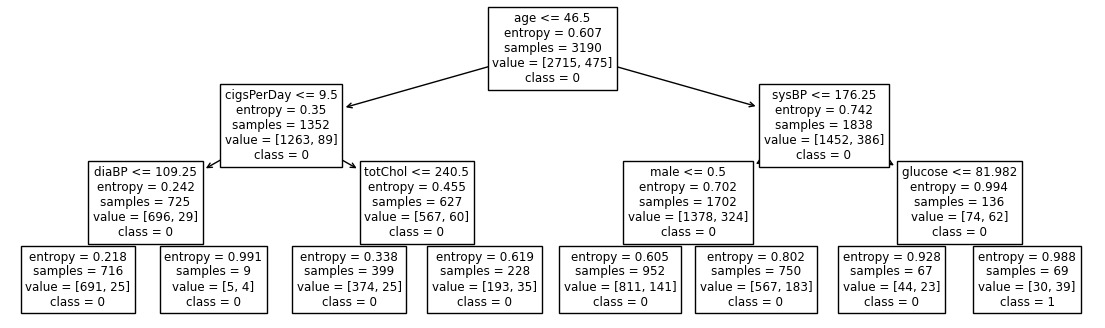

In [61]:
##Section V-visualizing the outputs
# Text format visualization
from sklearn import tree

text_representation = tree.export_text(dtree)
# visualizes the decision tree model generated by the classifier
print(text_representation)


# Visualizing the decision tree in boxes
fig = plt.figure(figsize=(14, 4))
feature_names = df.columns.tolist()  # saving the features in a list
feature_names.remove("target")  # Removing the target (0,1) from the features
class_names = [
    "0",
    "1",
]  # Manually adding the target classes, 0 means patient does not have diabetes, 1 means they have

print(feature_names, class_names)

# plot_tree function from scikit-learn's tree module is used to visualize the decision tree (dtree) using a tree-like representation.
_ = tree.plot_tree(dtree, feature_names=feature_names, class_names=class_names)

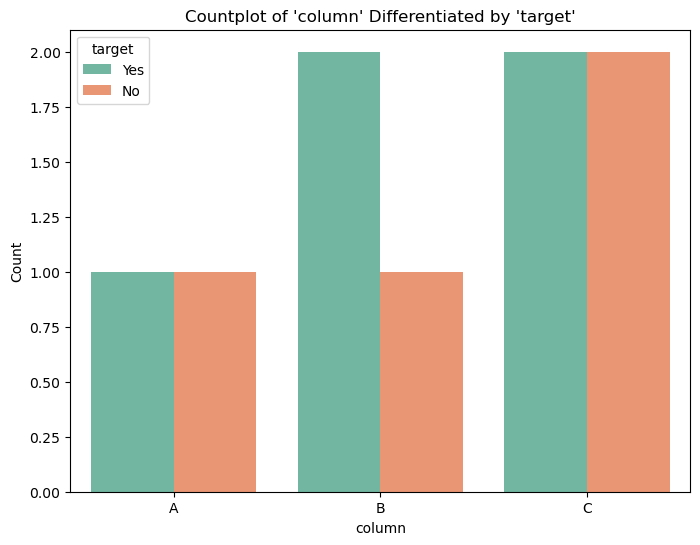

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    "column": ["A", "A", "B", "B", "B", "C", "C", "C", "C"],
    "target": ["Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No"],
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x=df["column"], hue=df["target"], palette="Set2")
plt.title("Countplot of 'column' Differentiated by 'target'")
plt.xlabel("column")
plt.ylabel("Count")
plt.legend(title="target")
plt.show()

## 3.2. Random Forest (Supplementary)

This is a similar classifying algorithm to the decision tree. A random forest is a meta-estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


## 3.3.linear regression

Here you get the basics of linear regression with an example. Before we delve into the linear regression mode, it is worth noting that in the text above we mentioned that each ML code usually consists of 5 general parts. In the "II. defining the algorithm" section in Pytorch, there are two structures that can be used (as in Tensorflow). These structures are shown below. Here, we will focus on the "A. Easy structure". Still, it is necessary for you to familiarize yourself with both structures in case you see them in other developers' codes. The below example is a simple 4-layer model written in two different ways which consisted of X inputs, 2 hidden layers, and Y outputs. We will discuss each of these functions later on. So it is OK if you do not understand the layers of the code at this point.

A. Easy structure


In [65]:
# II. defining an algorithm
# examples of A. easy structure model definition

import torch.nn as nn  # provides tools for building neural network models
import pandas as pd
import numpy as np

# Generate random data for X and Y
num_samples = 1000
num_features_X = 10
num_features_Y = 1

X = np.random.randn(num_samples, num_features_X)  # Generate random data for X
Y = np.random.randint(
    0, 2, size=(num_samples, num_features_Y)
)  # Generate random data for Y

# Generate random values for x1 and x2
x1 = np.random.randint(10, 20)  # Random integer between 10 and 20
x2 = np.random.randint(20, 30)  # Random integer between 20 and 30

"""
The defined neural network model consists of three fully connected layers 
with ReLU activation functions between them, 
followed by a softmax layer for multiclass classification. 

The number of neurons in each layer (X, x1, x2, Y) 
needs to be specified according to the input 
and output dimensions of your data.
"""
model = nn.Sequential(
    nn.Linear(
        num_features_X, x1
    ),  # a fully connected layer with num_features_X input features and x1 output features.
    nn.ReLU(),  # adds a Rectified Linear Unit activation function layer
    nn.Linear(x1, x2),
    nn.ReLU(),
    nn.Linear(
        x2, num_features_Y
    ),  # the output dimension should match the number of classes in Y
    nn.Softmax(
        dim=1
    ),  # a softmax layer is added to convert the output into a probability distribution over the classes
)

In [78]:
"""
B. Verbose structure
"""

# II. defining an algorithm

# examples of A. easy structure model definition
import torch.nn as nn
import torch


class PimaClassifier(nn.Module):
    def __init__(self, num_features_X, x1, x2, num_features_Y):
        super().__init__()
        self.hidden1 = nn.Linear(num_features_X, x1)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(x1, x2)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(x2, num_features_Y)

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = nn.functional.softmax(self.output(x), dim=1)
        return x


# Define dimensions and instantiate the classifier
num_features_X = 10
x1 = 20
x2 = 30
num_features_Y = 1

classifier = PimaClassifier(num_features_X, x1, x2, num_features_Y)
print(classifier.forward(torch.randn(1, num_features_X)))

tensor([[1.]], grad_fn=<SoftmaxBackward0>)


Now let's train a regression model with the easy structure mentioned above. Download and place the dataset below in your Python code folder. It is data gathered from 768 women and recorded their health measures and if they had diabetes or not. The inputs and outputs are:

8 Inputs (X): Number of times pregnant, Plasma glucose concentration at 2 hours in an oral glucose tolerance test, Diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm), 2-hour serum insulin (μIU/ml), Body mass index (weight in kg/(height in m)2), Diabetes pedigree function, Age (years)
1 Output(Y): Class label (0 or 1) - if they have diabetes

In the below code, you will build a linear regression model to predict based on X if a patient has a high risk of diabetes. The "Easy Structure" is used here (described above). Pay attention to the 5 sections of the model described above. Also, as another way of loading the dataset, the NumPy library is used here instead of Pandas. Run the code and see the results:


In [79]:
# importing libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Section I-importing data load the dataset, split into input (X) and output (y) variables.
dataset = np.genfromtxt(
    "./data/linear_regression/diabetes.csv", delimiter=",", usecols=range(9)
)  # Loading dataset Also np.loadtxt('diabetes.csv', delimiter=',')
X = dataset[
    1:, 0:8
]  # getting the 8 first columns as input. The reason for "1"instead of "0" is to discard the headings
y = dataset[
    1:, 8
]  # getting the last column as output. The reason for "1"instead of "0" is to discard the headings
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
# Splitting into train and validation datasets with 67% trainset and 33% validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [81]:
# Section II-defining the model:  linear regression model with 2 layers, input and output
model = nn.Sequential(nn.Linear(8, 1), nn.Sigmoid())
# priniting model layers and specifications
print(model)

# Secion III-training the model
n_epochs = 100
batch_size = 8
history = []
# define loss function
loss_fn = nn.MSELoss()
# define optimizer with a spicific learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        # take a batch
        Xbatch = X_train[i : i + batch_size]
        ybatch = y_train[i : i + batch_size]
        # forward pass
        y_pred = model(Xbatch)  #  torch.max(model(Xbatch), 1)
        loss = loss_fn(y_pred, ybatch)
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        # update weights
        optimizer.step()

    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    # mse_train = loss_fn(y_, y_test)
    mse = float(mse)
    history.append(mse)
    print(f"Finished epoch {epoch}, latest MSE {mse:.2f}")

Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)
Finished epoch 0, latest MSE 0.61
Finished epoch 1, latest MSE 0.61
Finished epoch 2, latest MSE 0.61
Finished epoch 3, latest MSE 0.61
Finished epoch 4, latest MSE 0.61
Finished epoch 5, latest MSE 0.61
Finished epoch 6, latest MSE 0.61
Finished epoch 7, latest MSE 0.61
Finished epoch 8, latest MSE 0.61
Finished epoch 9, latest MSE 0.61
Finished epoch 10, latest MSE 0.61
Finished epoch 11, latest MSE 0.61
Finished epoch 12, latest MSE 0.61
Finished epoch 13, latest MSE 0.61
Finished epoch 14, latest MSE 0.61
Finished epoch 15, latest MSE 0.61
Finished epoch 16, latest MSE 0.61
Finished epoch 17, latest MSE 0.60
Finished epoch 18, latest MSE 0.60
Finished epoch 19, latest MSE 0.59
Finished epoch 20, latest MSE 0.58
Finished epoch 21, latest MSE 0.49
Finished epoch 22, latest MSE 0.38
Finished epoch 23, latest MSE 0.38
Finished epoch 24, latest MSE 0.38
Finished epoch 25, latest MSE 0.38
Finished epoc

Accuracy 0.70


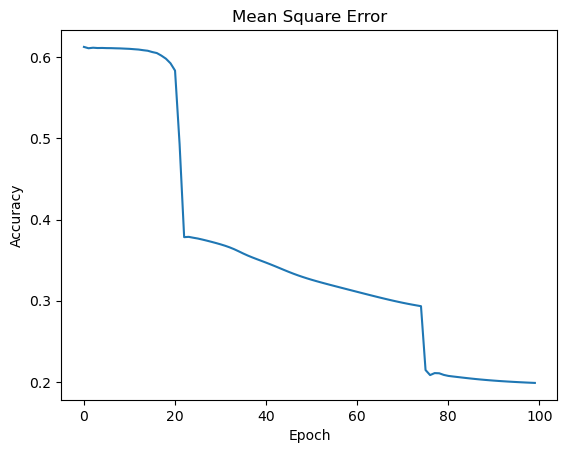

In [85]:
# Section IV-evaluating the model
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy:.2f}")

# Section V-visualizing the outputs
plt.plot(history)
plt.title("Mean Square Error")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

## 3.4.Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression, and outliers detection. Since implementing the decision tree is much easier with the Scikit-learn library, for this particular algorithm we will use it instead of Pytorch. It is mostly used for classification problems. The advantages of SVM are:

- Effective in high-dimensional spaces.
- Versatile
- Memory Efficient: Uses a subset of training points in the decision function (called support vectors).

However, the disadvantages of SVM are:

- The risk of overfitting is great. If the number of features is much greater than the number of samples, one should avoid over-fitting by choosing the Kernel functionsLinks to an external site. and regularization terms are crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation

**_C function:_** To avoid your model from overfitting, there is an inherent function in SVM called the C function. The more the amount of C function, the harsher the model will be punished when overfitted to the data. (if you are not familiar with overfitting, it is alright, as it will be explained later in the course.)

**_Kernel Function:_** To make things more interesting, the SVM algorithm has a Kernel function that determines the complexity of classification. This kernel should be chosen based on the nature of the problem. Here. we will only work with the "Linear" kernel. Read more in the documentation link, provided at the end of this section.

<img src="./img/svm.png" style="width: 800px">


In [1]:
# Example 1: classifying with SVM - 2 classes - Breast Cancer Data
# in this built-in example of the Sci-kit learn library, we try to predict breast cancer type based on input data. 0 means the cancer is benign type, 1 means the cancer is malignant
from sklearn import datasets  # Import train_test_split function
from sklearn.model_selection import (
    train_test_split,
)  # Import scikit-learn dataset library
from sklearn import svm  # Import svm model
from sklearn import (
    metrics,
)  # Import scikit-learn metrics module for accuracy calculation

# Load dataset
cancer = datasets.load_breast_cancer()

# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape
# print the cancer data features (top 5 records)
print(cancer.data[0:5])
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

# Split dataset into training set and test set - 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.3, random_state=109
)

# Create a svm Classifier with Linear Kernel
clf = svm.SVC(kernel="linear")
# Train the model using the training sets
clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# Model Precision and Recall: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-

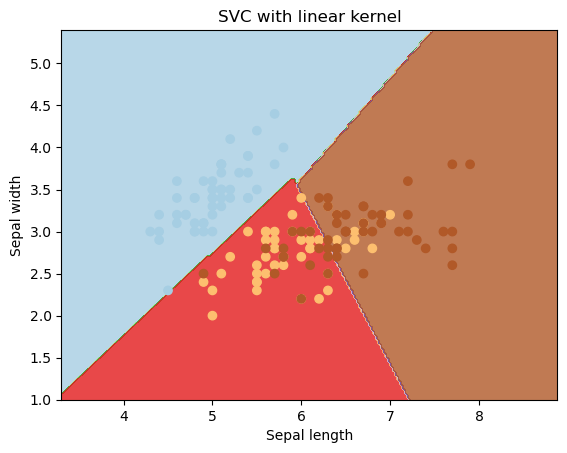

In [92]:
# Examples 2: classifying with SVM - 3 classes in XY plane
# This example classifies 3 classes of data scattered in the X -Y plane - There is a visualization at the end that shows how accurate the model functions:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel="linear", C=1, gamma=0).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.title("SVC with linear kernel")
plt.show()

## Section4: Unsupervised Machine Learning

-An Example:

Picture a toddler. The child knows what the family cat looks like (provided they have one) but has no idea that there are a lot of other cats in the world that are all different. The thing is, if the kid sees another cat, he or she will still be able to recognize it as a cat through a set of features such as two ears, four legs, a tail, fur, whiskers, etc.

In machine learning, this kind of prediction is called unsupervised learning. But when parents tell the child that the new animal is a cat – drumroll – that’s considered supervised learning.


### 4.1. Clustering (K-Means)

K-means clustering is an unsupervised algorithm that groups unlabelled data into different clusters. The K in its title represents the number of clusters that will be created. This is something that should be known prior to the model training. For example, if K=4 then 4 clusters would be created, and if K=7 then 7 clusters would be created. The k-means algorithm is used in fraud detection, error detection, and confirming existing clusters in the real world.

Conventional k-means require only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE)Links to an external site. after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value. Figure 6 shows the centroids and SSE updating through the first five iterations from two different runs of the k-means algorithm on the same dataset.

<img src="./img/k-means.png" style="width: 400px">


Let's show how it works with a small example. The problem is clustering a simple, unlabeled dataset on the X-Y plane. A method called the "Elbow method" is used to find the optimal number of clusters in the code below. Then the centroids are found through iterations.


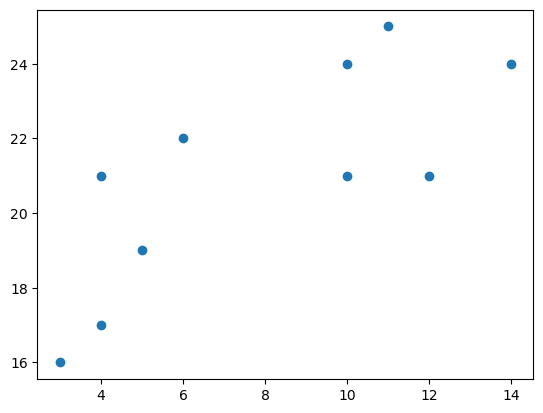

/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alexo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

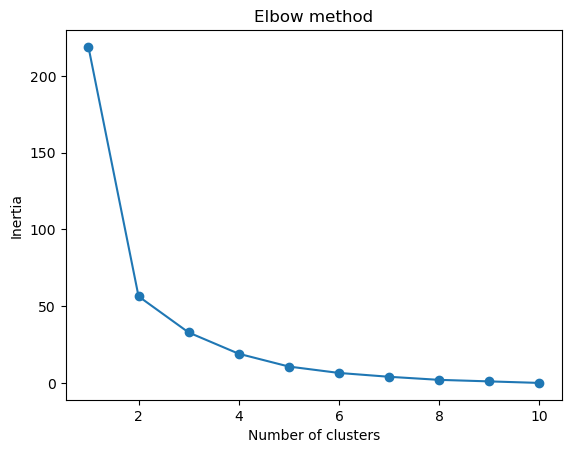

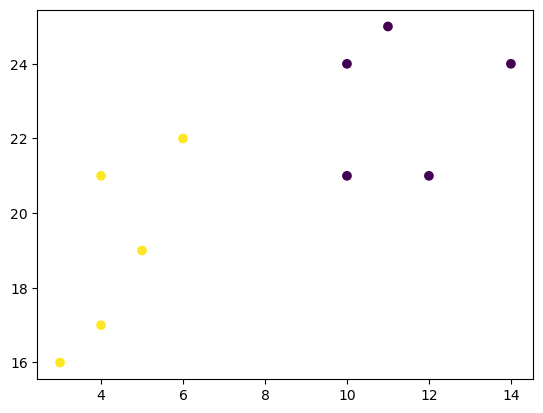

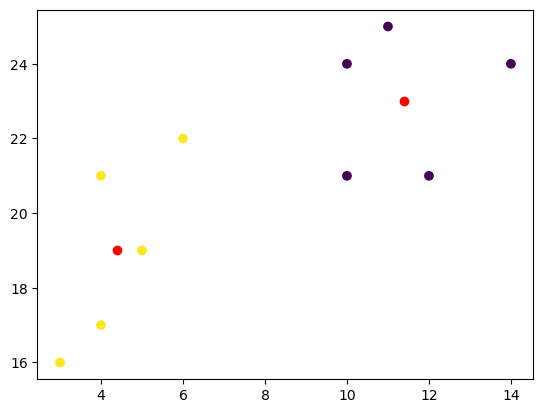

In [97]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# defined dataset on the X-Y plane
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

# making tuples of (X,Y) with the zip function
# the inertia is the same as the SSE (sum of squared error) that was defined above
data = list(zip(x, y))
inertias = []

# testing the data on 1 to 11 clusters and calculating the inertia
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker="o")
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# You can see on the plot that 2 is an elbow point. 2 is a good value for K, so we retrain and visualize the result.
kmeans = KMeans(n_clusters=2, n_init=5)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# Now lets add the centroids of each cluster to the plot

centroids = kmeans.cluster_centers_
plt.scatter(x, y, c=kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red")